In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the dataset
file_path = '/content/Combined.csv'
spotify_data = pd.read_csv(file_path)

#### Density Plot

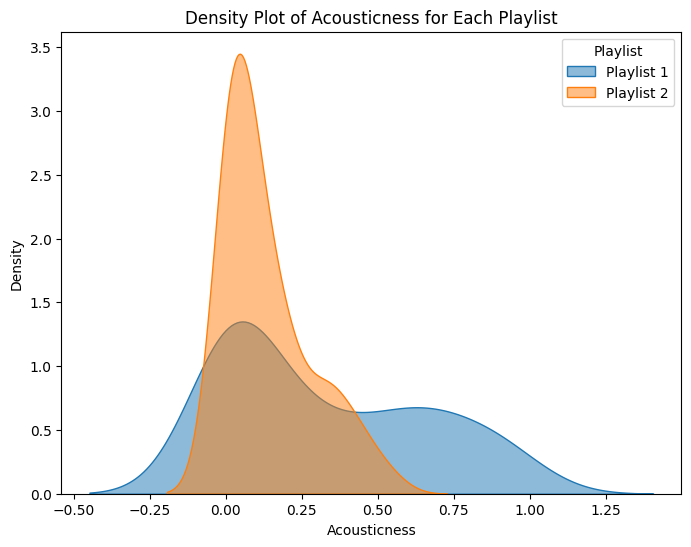

In [3]:
# Separate data for each playlist
playlist_1 = spotify_data[spotify_data["Playlist"] == "Playlist 1"]["Acousticness"]
playlist_2 = spotify_data[spotify_data["Playlist"] == "Playlist 2"]["Acousticness"]

# Plot density plots for each playlist
plt.figure(figsize=(8, 6))
sns.kdeplot(playlist_1, fill=True, alpha=0.5, label="Playlist 1")
sns.kdeplot(playlist_2, fill=True, alpha=0.5, label="Playlist 2")

# Add labels and legend
plt.title("Density Plot of Acousticness for Each Playlist")
plt.xlabel("Acousticness")
plt.ylabel("Density")
plt.legend(title="Playlist")
plt.show()

#### Scatter Plot

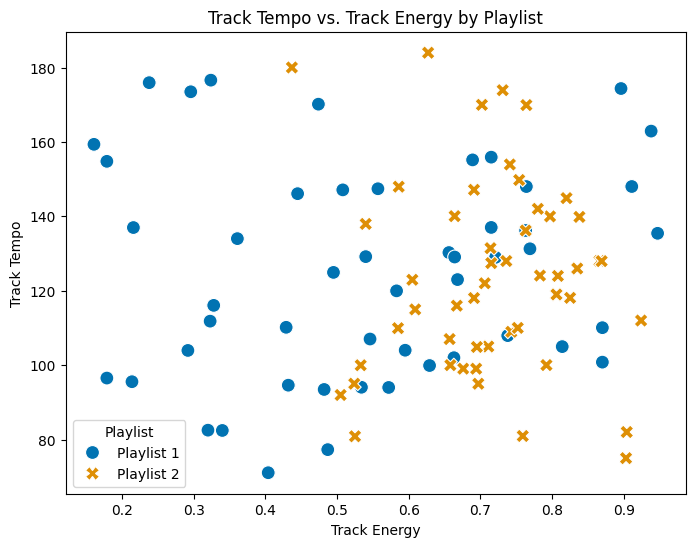

In [4]:
# Set color-blind-friendly palette
sns.set_palette("colorblind")

# Scatter plot for Track Tempo vs. Track Energy by Playlist
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=spotify_data,
    x="Energy",
    y="Tempo",
    hue="Playlist",
    style="Playlist",
    palette="colorblind",
    s=100
)
plt.title("Track Tempo vs. Track Energy by Playlist")
plt.xlabel("Track Energy")
plt.ylabel("Track Tempo")
plt.legend(title="Playlist")
plt.show()

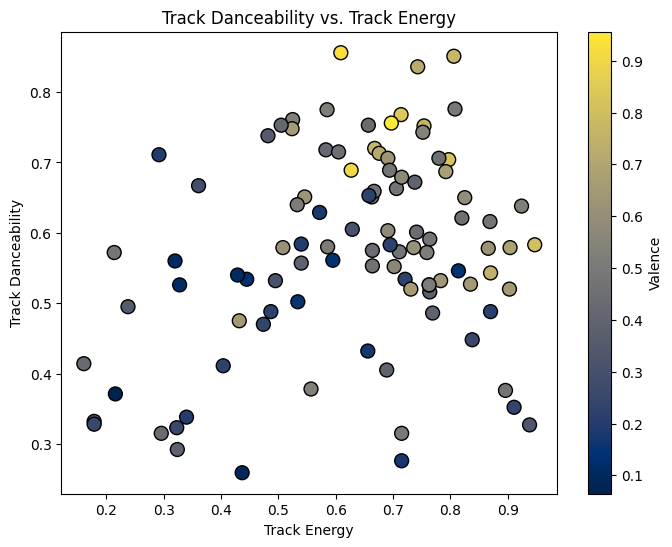

In [5]:
# Scatter plot for Track Danceability vs. Track Energy with color based on Valence
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    spotify_data["Energy"],
    spotify_data["Danceability"],
    c=spotify_data["Valence"],
    cmap="cividis",
    edgecolor="k",
    s=100
)
plt.colorbar(scatter, label="Valence")
plt.title("Track Danceability vs. Track Energy")
plt.xlabel("Track Energy")
plt.ylabel("Track Danceability")
plt.show()


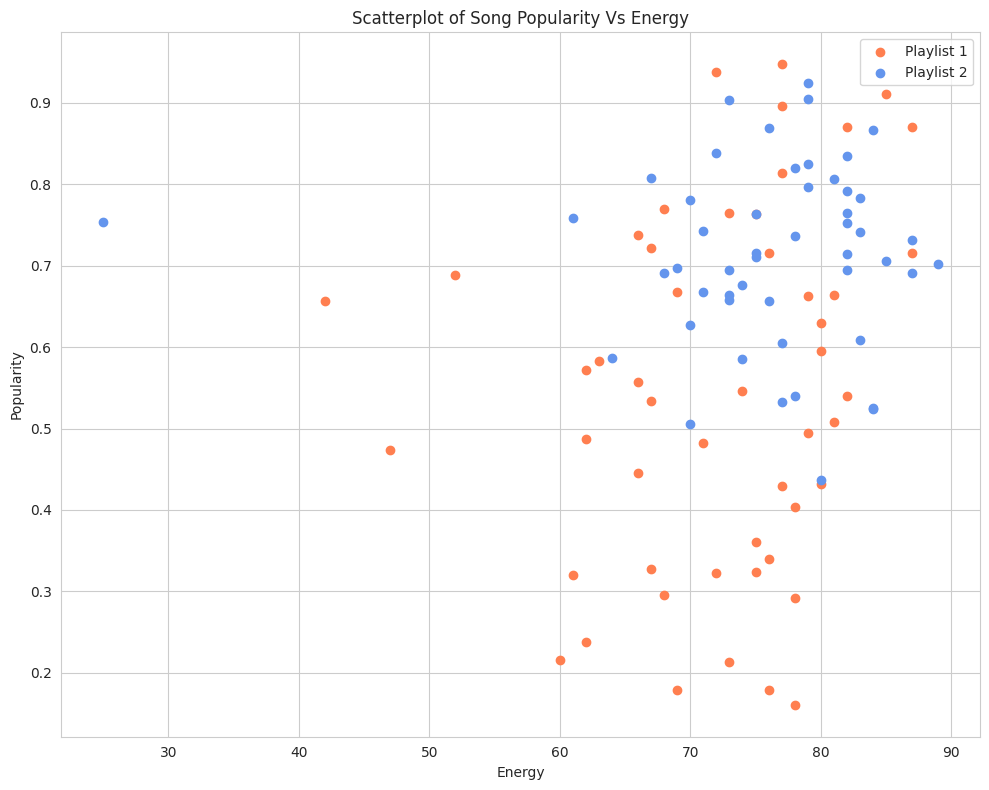

In [26]:
# Scatter plot for Playlist 1 and Playlist 2
plt.figure(figsize=(10, 8))

# Plot Playlist 1
playlist_1 = spotify_data[spotify_data["Playlist"] == "Playlist 1"]
plt.scatter(
    playlist_1["Popularity"], playlist_1["Energy"],
    color="coral", label="Playlist 1"
)

# Plot Playlist 2
playlist_2 = spotify_data[spotify_data["Playlist"] == "Playlist 2"]
plt.scatter(
    playlist_2["Popularity"], playlist_2["Energy"],
    color="cornflowerblue", label="Playlist 2"
)

# Add labels and legend
plt.title("Scatterplot of Song Popularity Vs Energy")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.legend()
plt.tight_layout()
plt.show()


#### Bar Chart

In [6]:
genres_data = pd.read_csv('/content/Genres.csv')

<ipython-input-7-f8bdc75fa6db>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x="Genre", y="Total Count", palette="colorblind")


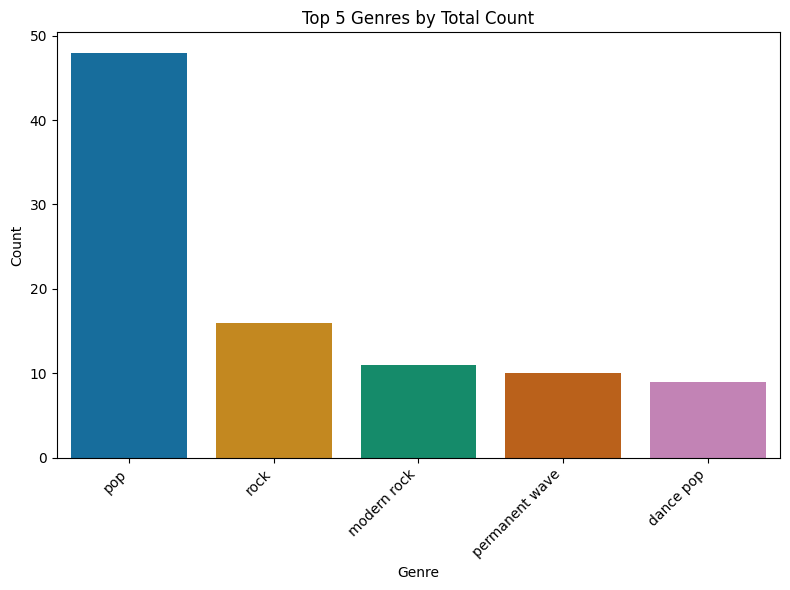

In [7]:
# Extract the top 5 genres by total count
top_genres = genres_data.nlargest(5, "Total Count")[["Genre", "Total Count"]]

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=top_genres, x="Genre", y="Total Count", palette="colorblind")

# Add labels and title
plt.title("Top 5 Genres by Total Count")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Histogram

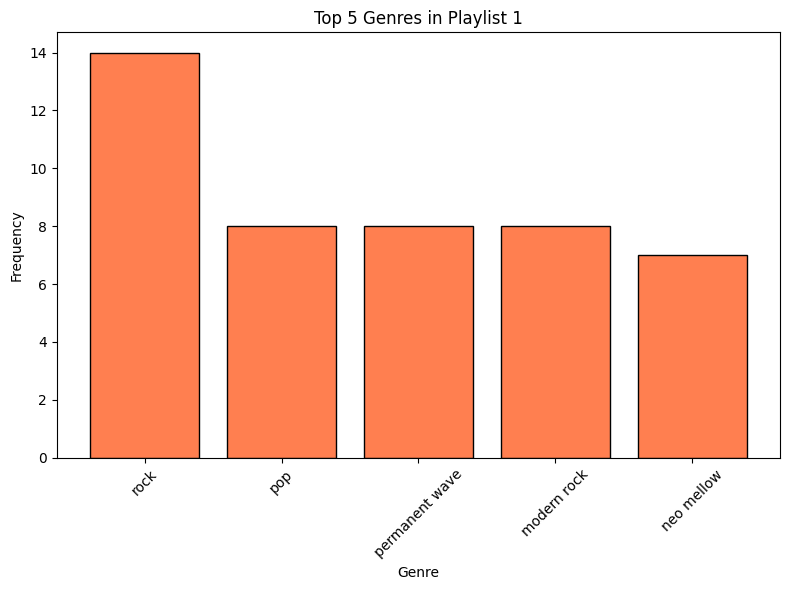

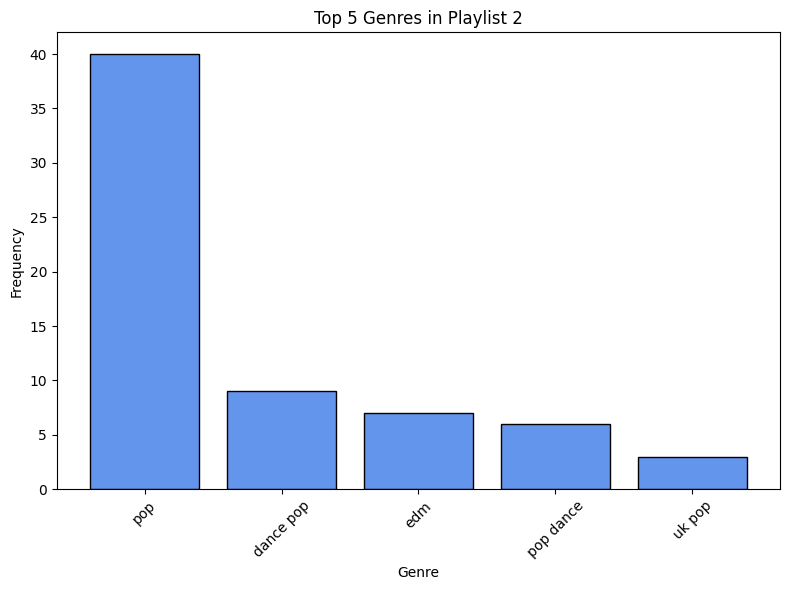

In [10]:
# Extract the top 5 genres for each playlist
top_playlist_1 = genres_data.nlargest(5, "Count in Playlist 1")[["Genre", "Count in Playlist 1"]]
top_playlist_2 = genres_data.nlargest(5, "Count in Playlist 2")[["Genre", "Count in Playlist 2"]]

# Plot for Playlist 1
plt.figure(figsize=(8, 6))
plt.bar(top_playlist_1["Genre"], top_playlist_1["Count in Playlist 1"], color="coral", edgecolor="black")
plt.title("Top 5 Genres in Playlist 1")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Playlist 2
plt.figure(figsize=(8, 6))
plt.bar(top_playlist_2["Genre"], top_playlist_2["Count in Playlist 2"], color="cornflowerblue", edgecolor="black")
plt.title("Top 5 Genres in Playlist 2")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



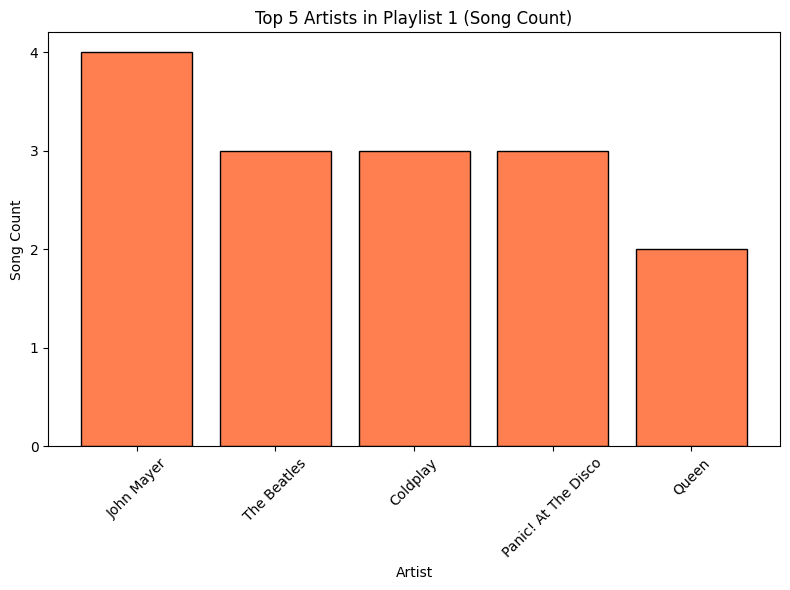

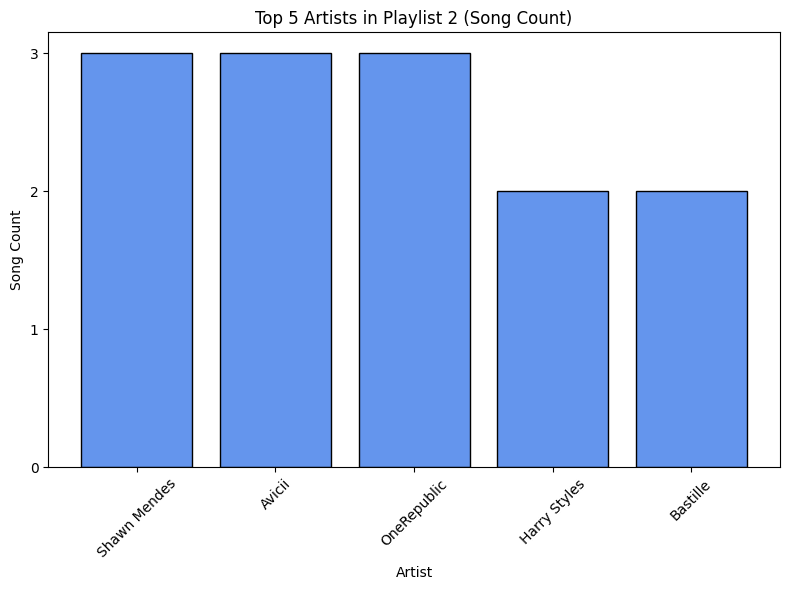

In [18]:
from matplotlib.ticker import MaxNLocator

# Count songs for each artist in both playlists
spotify_data["Artist(s)"] = spotify_data["Artist(s)"].str.strip("[]").str.replace("'", "").str.split(", ")
artist_counts_playlist_1 = spotify_data[spotify_data["Playlist"] == "Playlist 1"]["Artist(s)"].explode().value_counts()
artist_counts_playlist_2 = spotify_data[spotify_data["Playlist"] == "Playlist 2"]["Artist(s)"].explode().value_counts()

# Extract the top 5 artists for each playlist
top_artists_playlist_1 = artist_counts_playlist_1.nlargest(5)
top_artists_playlist_2 = artist_counts_playlist_2.nlargest(5)

# Plot for Playlist 1
plt.figure(figsize=(8, 6))
plt.bar(top_artists_playlist_1.index, top_artists_playlist_1.values, color="coral", edgecolor="black")
plt.title("Top 5 Artists in Playlist 1 (Song Count)")
plt.xlabel("Artist")
plt.ylabel("Song Count")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

# Plot for Playlist 2
plt.figure(figsize=(8, 6))
plt.bar(top_artists_playlist_2.index, top_artists_playlist_2.values, color="cornflowerblue", edgecolor="black")
plt.title("Top 5 Artists in Playlist 2 (Song Count)")
plt.xlabel("Artist")
plt.ylabel("Song Count")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


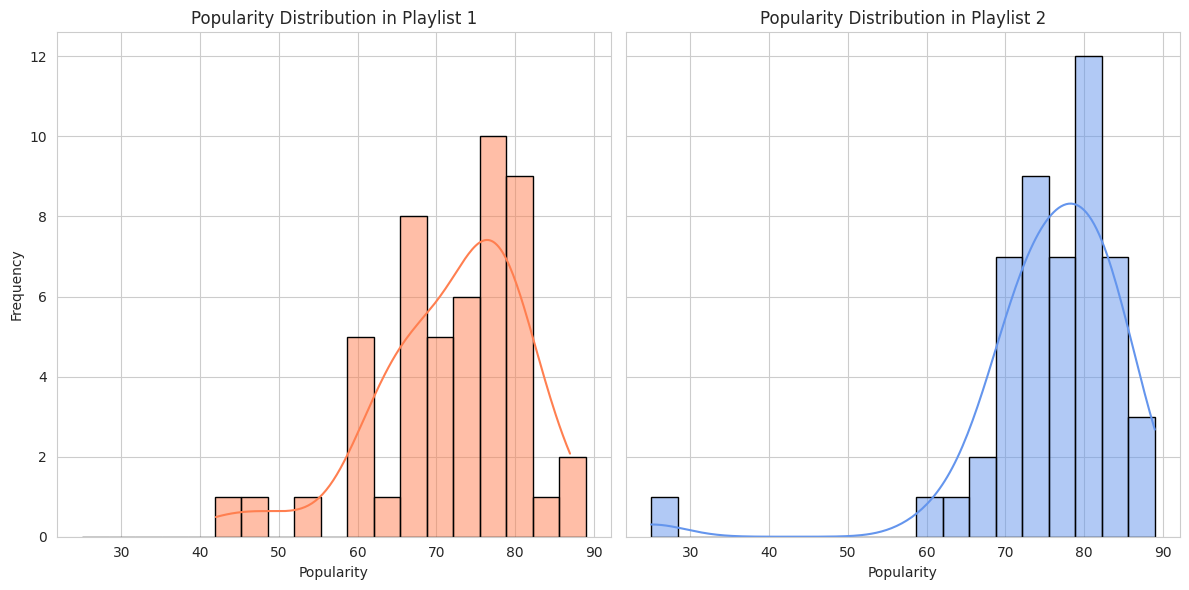

In [22]:
import numpy as np

# Set the style for the plot
sns.set_style("whitegrid")

# Determine the range of popularity and define bins
popularity_min = spotify_data["Popularity"].min()
popularity_max = spotify_data["Popularity"].max()
bins = np.linspace(popularity_min, popularity_max, 20)

# Create subplots for side-by-side KDE with histogram plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# KDE with histogram for Playlist 1
sns.histplot(
    data=spotify_data[spotify_data["Playlist"] == "Playlist 1"],
    x="Popularity",
    kde=True,
    ax=axes[0],
    color="coral",
    edgecolor="black",
    bins=bins
)
axes[0].set_title("Popularity Distribution in Playlist 1")
axes[0].set_xlabel("Popularity")
axes[0].set_ylabel("Frequency")

# KDE with histogram for Playlist 2
sns.histplot(
    data=spotify_data[spotify_data["Playlist"] == "Playlist 2"],
    x="Popularity",
    kde=True,
    ax=axes[1],
    color="cornflowerblue",
    edgecolor="black",
    bins=bins
)
axes[1].set_title("Popularity Distribution in Playlist 2")
axes[1].set_xlabel("Popularity")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

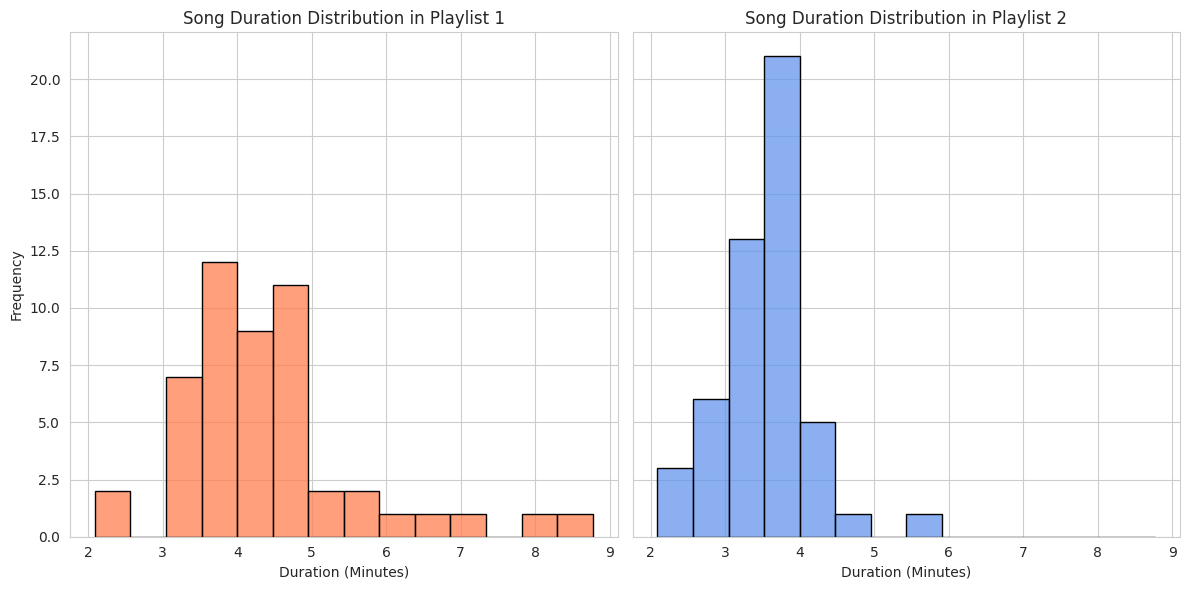

In [24]:
# Set the style for the plot
sns.set_style("whitegrid")

# Determine the range of durations and define bins
duration_min = spotify_data["Duration"].min()
duration_max = spotify_data["Duration"].max()
bins = np.linspace(duration_min, duration_max, 15)

# Create subplots for side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Histogram for Playlist 1
sns.histplot(
    data=spotify_data[spotify_data["Playlist"] == "Playlist 1"],
    x="Duration",
    ax=axes[0],
    color="coral",
    edgecolor="black",
    bins=bins
)
axes[0].set_title("Song Duration Distribution in Playlist 1")
axes[0].set_xlabel("Duration (Minutes)")
axes[0].set_ylabel("Frequency")

# Histogram for Playlist 2
sns.histplot(
    data=spotify_data[spotify_data["Playlist"] == "Playlist 2"],
    x="Duration",
    ax=axes[1],
    color="cornflowerblue",
    edgecolor="black",
    bins=bins
)
axes[1].set_title("Song Duration Distribution in Playlist 2")
axes[1].set_xlabel("Duration (Minutes)")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


#### Parallel Coordinate Plot

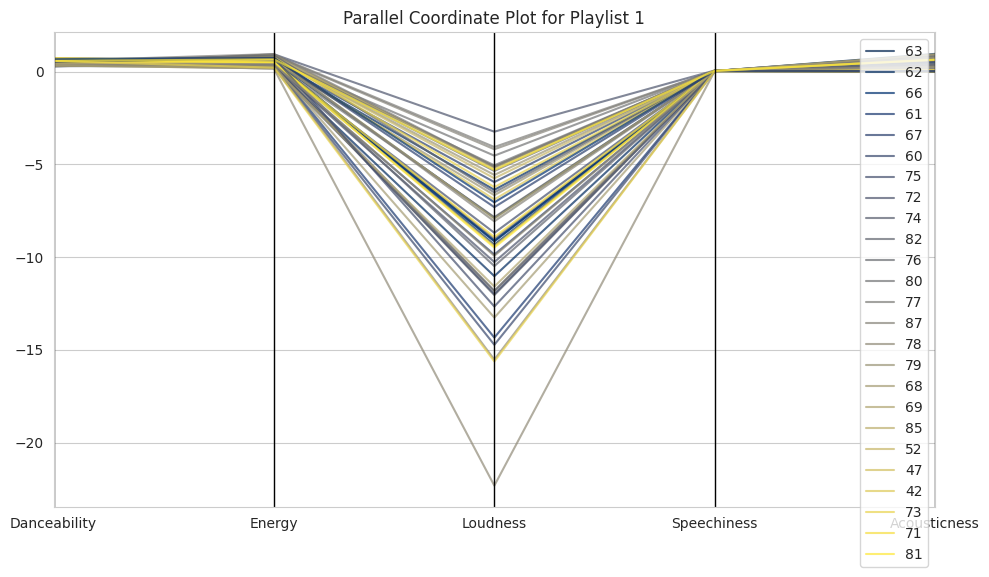

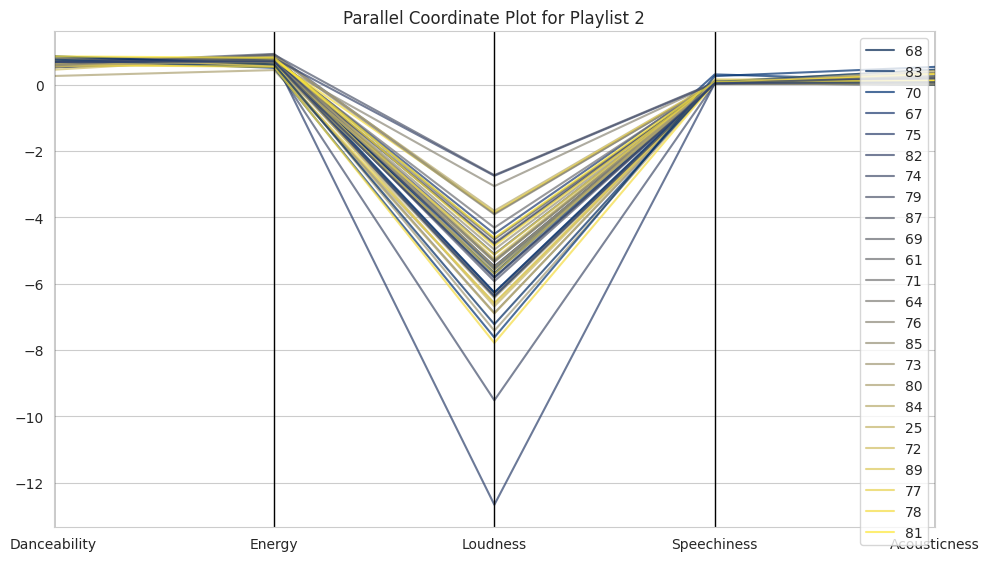

In [34]:
from pandas.plotting import parallel_coordinates

# Prepare the data for Playlist 1
playlist_1 = spotify_data[spotify_data["Playlist"] == "Playlist 1"].copy()
playlist_1['Popularity'] = playlist_1['Popularity'].astype(str)

# Plot for Playlist 1
plt.figure(figsize=(10, 6))
parallel_coordinates(playlist_1[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness']],
                     class_column='Popularity',
                     colormap='cividis',
                     alpha=0.7)
plt.title("Parallel Coordinate Plot for Playlist 1")
plt.grid(True)
plt.tight_layout()
plt.show()

# Prepare the data for Playlist 2
playlist_2 = spotify_data[spotify_data["Playlist"] == "Playlist 2"].copy()
playlist_2['Popularity'] = playlist_2['Popularity'].astype(str)

# Plot for Playlist 2
plt.figure(figsize=(10, 6))
parallel_coordinates(playlist_2[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness']],
                     class_column='Popularity',
                     colormap='cividis',
                     alpha=0.7)
plt.title("Parallel Coordinate Plot for Playlist 2")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Treemaps

In [35]:
!pip install squarify

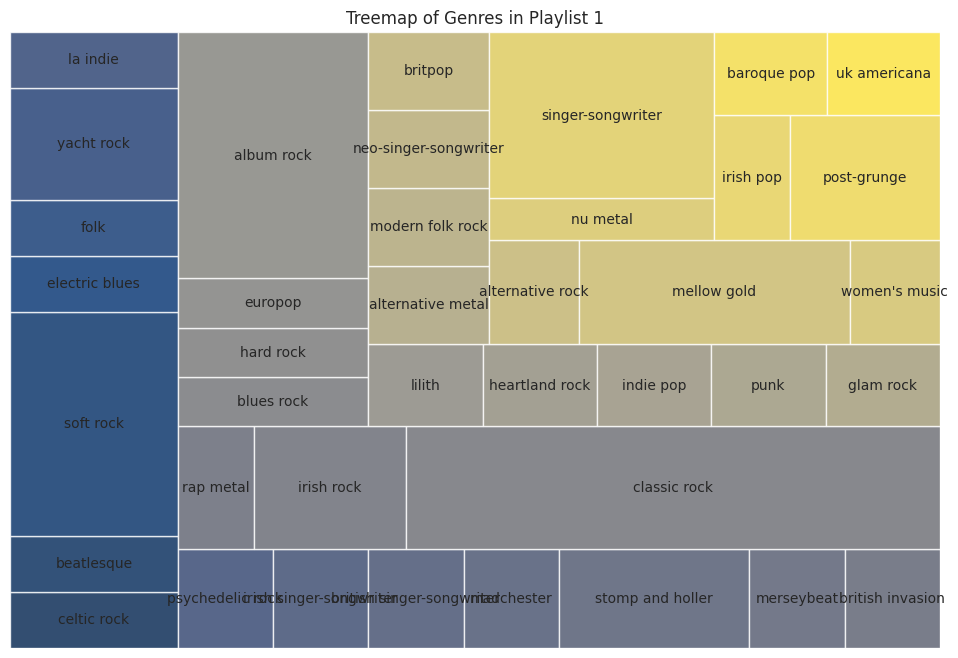

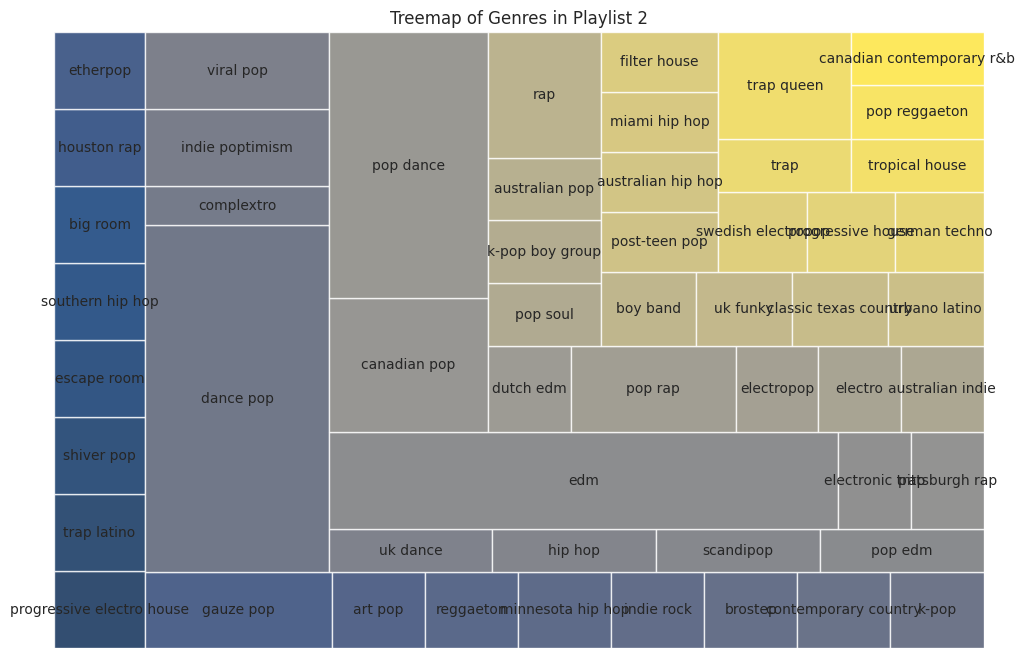

In [38]:
import squarify

# Prepare data for Playlist 1
playlist_1_genres = genres_data[genres_data["Playlist"] == "Playlist 1"][["Genre", "Count in Playlist 1"]]
playlist_1_genres = playlist_1_genres.rename(columns={"Count in Playlist 1": "Count"})

# Prepare data for Playlist 2
playlist_2_genres = genres_data[genres_data["Playlist"] == "Playlist 2"][["Genre", "Count in Playlist 2"]]
playlist_2_genres = playlist_2_genres.rename(columns={"Count in Playlist 2": "Count"})

# Plot for Playlist 1 with "cividis" colormap
plt.figure(figsize=(12, 8))
colors_playlist_1 = plt.cm.cividis([i / len(playlist_1_genres) for i in range(len(playlist_1_genres))])
squarify.plot(
    sizes=playlist_1_genres["Count"],
    label=playlist_1_genres["Genre"],
    alpha=0.8,
    color=colors_playlist_1
)
plt.title("Treemap of Genres in Playlist 1")
plt.axis("off")
plt.show()

# Plot for Playlist 2 with "cividis" colormap
plt.figure(figsize=(12, 8))
colors_playlist_2 = plt.cm.cividis([i / len(playlist_2_genres) for i in range(len(playlist_2_genres))])
squarify.plot(
    sizes=playlist_2_genres["Count"],
    label=playlist_2_genres["Genre"],
    alpha=0.8,
    color=colors_playlist_2
)
plt.title("Treemap of Genres in Playlist 2")
plt.axis("off")
plt.show()

#### Wordclouds

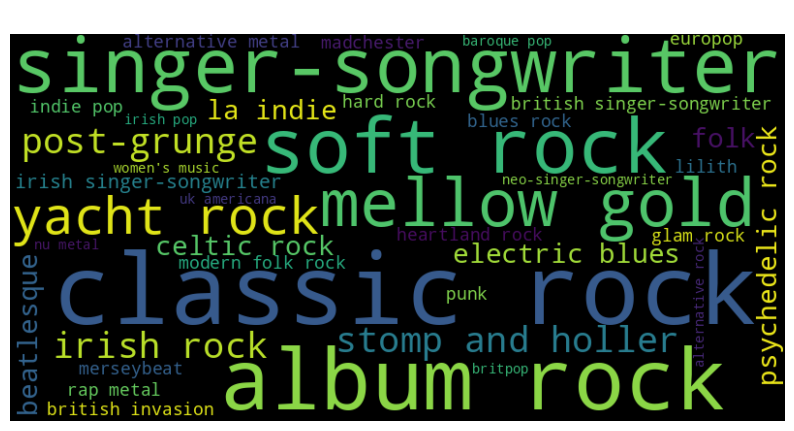

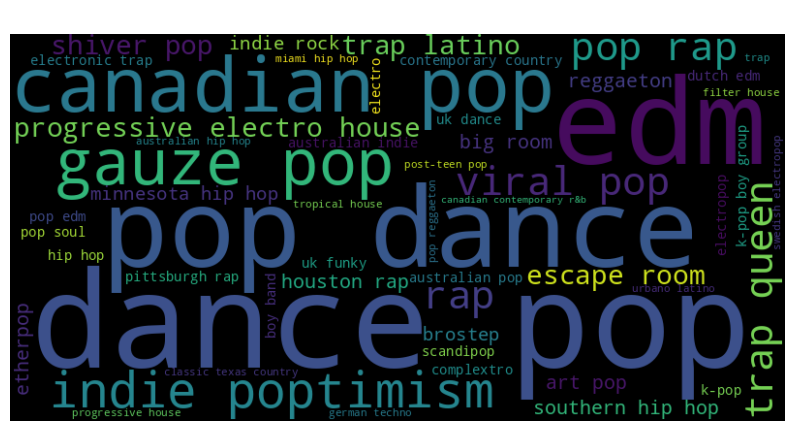

In [40]:
from wordcloud import WordCloud

# Prepare data for Playlist 1
playlist_1_genres = genres_data[genres_data["Playlist"] == "Playlist 1"][["Genre", "Count in Playlist 1"]]
playlist_1_genres_dict = dict(zip(playlist_1_genres["Genre"], playlist_1_genres["Count in Playlist 1"]))

# Prepare data for Playlist 2
playlist_2_genres = genres_data[genres_data["Playlist"] == "Playlist 2"][["Genre", "Count in Playlist 2"]]
playlist_2_genres_dict = dict(zip(playlist_2_genres["Genre"], playlist_2_genres["Count in Playlist 2"]))

# Generate word cloud for Playlist 1
wordcloud_1 = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="viridis"
).generate_from_frequencies(playlist_1_genres_dict)

# Generate word cloud for Playlist 2
wordcloud_2 = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="viridis"
).generate_from_frequencies(playlist_2_genres_dict)

# Plot Word Cloud for Playlist 1
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Genres in Playlist 1", color="white", fontsize=16)
plt.show()

# Plot Word Cloud for Playlist 2
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Genres in Playlist 2", color="white", fontsize=16)
plt.show()

#### Radar Chart

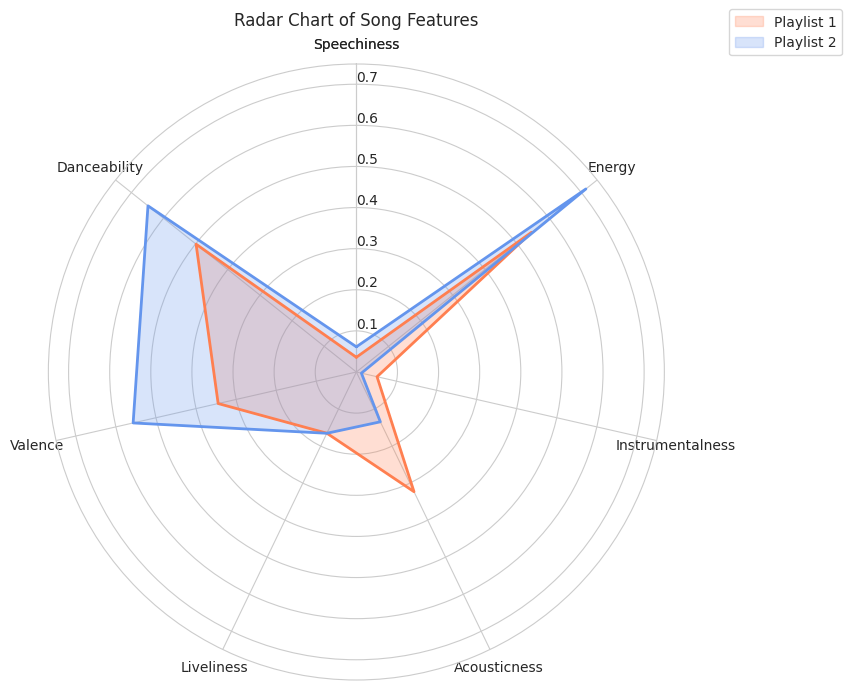

In [42]:
# Select features for the radar chart
features = ['Speechiness', 'Energy', 'Instrumentalness', 'Acousticness', 'Liveliness', 'Valence', 'Danceability']

# Calculate mean values for Playlist 1 and Playlist 2
playlist_1_means = spotify_data[spotify_data["Playlist"] == "Playlist 1"][features].mean()
playlist_2_means = spotify_data[spotify_data["Playlist"] == "Playlist 2"][features].mean()

# Add the first feature to the end to close the radar chart
values_1 = np.append(playlist_1_means.values, playlist_1_means.values[0])
values_2 = np.append(playlist_2_means.values, playlist_2_means.values[0])
feature_labels = features + [features[0]]

# Create the radar chart
angles = np.linspace(0, 2 * np.pi, len(feature_labels), endpoint=True)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot Playlist 1
ax.fill(angles, values_1, color='coral', alpha=0.25, label='Playlist 1')
ax.plot(angles, values_1, color='coral', linewidth=2)

# Plot Playlist 2
ax.fill(angles, values_2, color='cornflowerblue', alpha=0.25, label='Playlist 2')
ax.plot(angles, values_2, color='cornflowerblue', linewidth=2)

# Customize the radar chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(angles * 180 / np.pi, feature_labels)
ax.set_rlabel_position(0)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_title("Radar Chart of Song Features", va='bottom')

plt.show()